# AIR QUALITY INDEX ANALYSIS USING ML MODELS

## Introduction
India's air quality has long been plagued by issues. In this analysis, I'll explore the impact of pre-2020 and post-2020 on the environment, with a particular focus on air pollution in India. Additionally, I will discuss the implementation of machine learning classification tools to classify the air quality conditions. By examining these factors, we can gain insights into India's progress in addressing air pollution and its efforts to improve the overall environmental situation.

## modules used

In [1]:
#loading
!pip install pandas
import pandas as pd
!pip install numpy
import numpy as np
!pip install missingno
import missingno as msno
# Data Visualization
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
!pip install plotly
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
!pip install cufflinks
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#preprocessing 
!pip install sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification 
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 336.6 kB/s eta 0:00:00m eta 0:00:010:00:18


In [2]:
data = pd.read_csv(r"./city_day.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
data.describe

<bound method NDFrame.describe of                 City       Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad 2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad 2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad 2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad 2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad 2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...        ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam 2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam 2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam 2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam 2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam 2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Tol

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

## Exploratory Data Analysis


<Axes: >

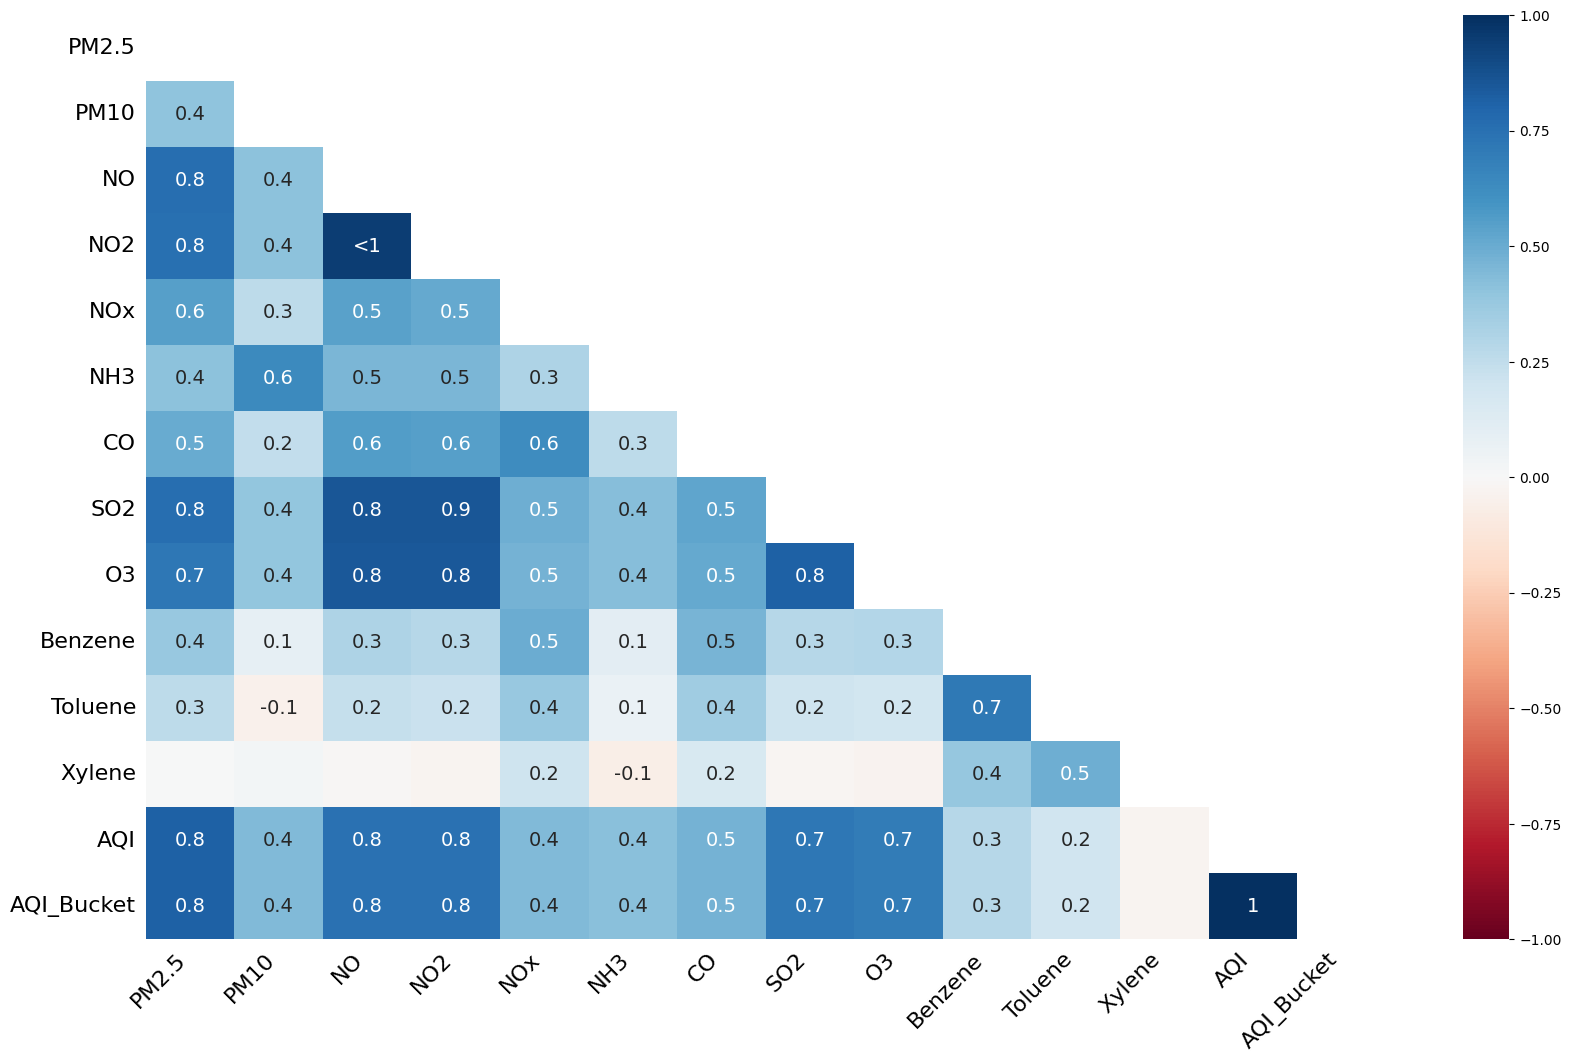

In [5]:
msno.heatmap(data)

In [6]:
def fill_missing_values(data):
    columns_to_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
    df1 = data.copy()
    df1[columns_to_fill] = df1[columns_to_fill].fillna(df1[columns_to_fill].median())
    df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('Moderate')
    return df1


In [7]:
df1 = fill_missing_values(data)
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate


In [8]:
def process_data(df, date_string='after'):
    if date_string < 'before':
        df = df[df['Date'] < '2020-01-01']
    else:
        df = df[df['Date'] >= '2020-01-01']
    
    df['Vehicular Pollution content'] = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO']].sum(axis=1)
    df['Industrial Pollution content'] = df[['SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']].sum(axis=1)
    df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'], axis=1)
    
    return df.copy()


In [9]:
df_before = process_data(df1, 'before')
df_before.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4646 entries, 1826 to 29530
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          4646 non-null   object        
 1   Date                          4646 non-null   datetime64[ns]
 2   AQI                           4646 non-null   float64       
 3   AQI_Bucket                    4646 non-null   object        
 4   Vehicular Pollution content   4646 non-null   float64       
 5   Industrial Pollution content  4646 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 254.1+ KB


In [10]:
def ploting(var):
    df_before[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black', )

def max_bar_plot(var):
    x1 = df_before[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))
def min_bar_plot(var):
    x1 = df_before[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))


In [11]:

ploting('Vehicular Pollution content')
ploting('Industrial Pollution content')

In [12]:

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

In [13]:
p1 = min_bar_plot('Industrial Pollution content')
p2 = min_bar_plot('Vehicular Pollution content')

In [14]:
def al(var):
    cities = [var]
    filtered_city_day = df1[df1['Date'] > '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','AQI_Bucket']]
    AQI[var] = AQI['AQI_Bucket']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
df_row = pd.concat([c11,c22,c33,c44,c55],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Post 2020)')

## Data preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['AQI_Bucket']=le.fit_transform(df1['AQI_Bucket'].astype(str))
df1.info()

categorical_attributes ['City', 'AQI_Bucket']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  int64         
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-nu

In [24]:
corr_matrix = df1.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_39276/3322301242.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,1.000000,0.062446,-0.021395,0.047182,-0.078589,0.024948,-0.182565,-0.255886,-0.101327,0.001530,0.002070,-0.062730,-0.047806,-0.121778,-0.053770
PM2.5,0.062446,1.000000,0.520767,0.435245,0.358287,0.375938,0.164615,0.093695,0.120451,0.166064,0.030539,0.132609,0.087813,0.633654,0.408614
PM10,-0.021395,0.520767,1.000000,0.433864,0.352396,0.416523,0.200548,0.023932,0.165468,0.208398,0.027522,0.126400,0.030257,0.447686,0.208080
NO,0.047182,0.435245,0.433864,1.000000,0.465848,0.747409,0.155804,0.221445,0.174881,0.020788,0.045202,0.151930,0.084393,0.438039,0.259407
NO2,-0.078589,0.358287,0.352396,0.465848,1.000000,0.581938,0.151731,0.361750,0.388413,0.289435,0.042179,0.297913,0.188965,0.531952,0.259199
NOx,0.024948,0.375938,0.416523,0.747409,0.581938,1.000000,0.129433,0.231878,0.205912,0.089095,0.049004,0.184764,0.085447,0.436282,0.212592
NH3,-0.182565,0.164615,0.200548,0.155804,0.151731,0.129433,1.000000,-0.014252,-0.048679,0.076295,0.004093,0.020040,-0.030328,0.097916,0.077250
CO,-0.255886,0.093695,0.023932,0.221445,0.361750,0.231878,-0.014252,1.000000,0.476784,0.043311,0.066022,0.285559,0.181215,0.650475,0.215848
SO2,-0.101327,0.120451,0.165468,0.174881,0.388413,0.205912,-0.048679,0.476784,1.000000,0.160489,0.038955,0.273314,0.249808,0.454182,0.170843
O3,0.001530,0.166064,0.208398,0.020788,0.289435,0.089095,0.076295,0.043311,0.160489,1.000000,0.023982,0.135498,0.084323,0.199100,0.030637


In [17]:
y = df1["AQI_Bucket"]
x = df1[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [18]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({1: 9393, 3: 5799, 2: 1940, 5: 1634, 4: 957, 0: 948})


The target label distribution shows an imbalance, which can lead to data imbalance issues. To address this problem, we can employ a technique called SMOTE (Synthetic Minority Oversampling Technique). SMOTE tackles this challenge by oversampling examples in the minority class, effectively balancing the data distribution and mitigating the impact of data imbalance

In [19]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
Classes and number of values in trainset after SMOTE: Counter({1: 9393, 5: 9393, 3: 9393, 0: 9393, 2: 9393, 4: 9393})



## Classification and prediction

### Support Vector Classifier

In [20]:
cls = SVC()
cls.fit(X_train,y_train)
svmpred=cls.predict(X_test)
svmpred
cm=confusion_matrix(y_test,svmpred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test,svmpred)
print("accuracy",accuracy*100)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 3944   80   93    0    0]
 [   0    0  821    0    0   20]
 [ 126    1    0 2298    0    0]
 [   0    0    0    0  377    4]
 [   0    0    2    0    9  692]]


accuracy 96.21896162528216


### Random Forest Classifier

In [21]:
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)
rf_predict1=rf.predict(X_train)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("accuracy",rf_acc_score*100)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 4117    0    0    0    0]
 [   0    2  839    0    0    0]
 [   0    1    0 2424    0    0]
 [   0    0    1    0  380    0]
 [   0    0    1    0    0  702]]


accuracy 99.94356659142211


### XGBClassifier

In [22]:
gbc=XGBClassifier(learning_rate =0.01,n_estimators=100,max_depth=1,
                  min_child_weight=6,subsample=0.8,seed=13)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)*100
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("accuracy",accuracy)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 4117    0    0    0    0]
 [   0    0  841    0    0    0]
 [   0    0    0 2425    0    0]
 [   0    0    0    0  381    0]
 [   0    0    0    0    0  703]]


accuracy 100.0


### Combined Model Classifier

In [23]:
from sklearn.ensemble import VotingClassifier

svc = SVC()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

combined_model = VotingClassifier(
    estimators=[('svc', svc), ('rfc', rfc), ('xgb', xgb)],
    voting='hard'
)

combined_model.fit(X_train, y_train)

predictions = combined_model.predict(X_test)

combined_model_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)*100
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("accuracy",accuracy)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 4117    0    0    0    0]
 [   0    0  841    0    0    0]
 [   0    0    0 2425    0    0]
 [   0    0    0    0  381    0]
 [   0    0    0    0    0  703]]


accuracy 99.97742663656885


## Conclusion

Based on the analysis conducted, several key findings have emerged. Firstly, a strong correlation has been observed between vehicular pollution contents and the air quality index, indicating that the former significantly impacts the latter. Secondly, among all cities, Delhi stands out as the most polluted city specifically due to high levels of vehicular pollution contents. Conversely, Ahmadabad exhibits the highest levels of industrial pollution content, making it the most polluted city in that regard. Notably, a positive trend has been observed after 2020, indicating a gradual decrease in both vehicular pollution contents and industrial pollution content, suggesting potential improvements in air quality. Finally, the Extra Gradient Boost classifier has displayed exceptional performance, achieving a 100% accuracy rate in classifying the target variable. These findings shed light on the association between pollution contents and air quality, identify the most affected cities, highlight a positive shift in pollution levels over time, and demonstrate the effectiveness of the Extra Gradient Boost classifier in accurate classification. These insights are crucial for understanding the impact of pollution on the environment and guiding future pollution control measures.